# Prosper Loan Data Exploration and Visualization

The purpose of this exercise will be to import and explore a very robust data set focused on loans made by the Prosper financial company and their status at the time of data extraction.

We will start by importing the data and cleaning it up a bit for ease of use and accuracy.

In [1]:
#To start we have to import necessary packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Now we put the data into a pandas dataframe and look at some basic information
Prosper = pd.read_csv('prosperLoanData.csv')
Prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [3]:
Prosper.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
Prosper.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


Whoa! 81 columns.... no way that we will use all of this information. Let's try to remove some columns we definitely will not be using.

Based upon the variable definitions given for the prosper loan data I feel comfortable removing the following variables from my column list, as they will not be used moving forward. BorrowerState, CurrentlyInGroup, GroupKey, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, PublicRecordsLast10Years, PulicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent, TradesOpenedLast6Months, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, LoanCurrentDaysDelinquent, LoanFirstDefaultedCycleNumber, LoanOriginationQuarter, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, ClosedDate, ListinCreationDate, ListingKey, EstimatedLoss, EstimatedReturn, Occupation, EstimatedEffectiveYield, EmploymentStatusDuration, StatedMonthlyIncome, IncomeRange, ScorexChangeAtTimeOfListing

Some of these columns could be useful for further exploration once this basic one is completed but for now, I won't be using them. I also may drop more rows later, the df will still be very dense.

Before dropping the columns I will make a copy of the df so that, in case of a mistake, we have an intact data set to roll back to.

In [5]:
loan_data = Prosper.copy()

columns_to_drop = ['BorrowerState', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 
                   'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 
                   'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 
                   'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 
                   'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 
                   'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'LoanCurrentDaysDelinquent', 
                   'LoanFirstDefaultedCycleNumber', 'LoanOriginationQuarter', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 
                   'LP_InterestandFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 
                   'LP_NonPrincipalRecoverypayments', 'ClosedDate', 'ListingCreationDate', 'ListingKey', 'EstimatedLoss', 
                   'EstimatedReturn', 'Occupation', 'EstimatedEffectiveYield', 'EmploymentStatusDuration', 'StatedMonthlyIncome', 
                   'IncomeRange', 'ScorexChangeAtTimeOfListing']
loan_data = loan_data.drop(columns=columns_to_drop, inplace=False)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 36 columns):
ListingNumber                  113937 non-null int64
CreditGrade                    28953 non-null object
Term                           113937 non-null int64
LoanStatus                     113937 non-null object
BorrowerAPR                    113912 non-null float64
BorrowerRate                   113937 non-null float64
LenderYield                    113937 non-null float64
ProsperRating (numeric)        84853 non-null float64
ProsperRating (Alpha)          84853 non-null object
ProsperScore                   84853 non-null float64
ListingCategory (numeric)      113937 non-null int64
EmploymentStatus               111682 non-null object
IsBorrowerHomeowner            113937 non-null bool
CurrentDelinquencies           113240 non-null float64
AmountDelinquent               106315 non-null float64
DelinquenciesLast7Years        112947 non-null float64
DebtToIncomeRatio         

Unfortunately, there are still many columns that are not complete, which is indicated by the df.info() function. I need to look at these columns to see if I can fill in the missing data and if not, it is unlikely they can be used in analysis.

So, for the 'CreditGrade' column, upon further inspection, only has entries pre 2009. So I am going to safely drop that one. Consequently, all the Prosper rating related columns(ProsperRating alpha and numeric) and Prosper Score are just the opposite of the previously mentioned. I want to drop the two ratings columns but keep the score just in case I decide to look at it's different levels 1-10. Beyond that, the Prosper Payments and info columns turned out to be only consisting of accounts that had a history with Prosper so they had completed or had outstanding loan accounts in the past. That only accounted for about 20% of our overall data so maybe I will just make a new column that indicates whether they've had an account in the past and explore those levels.

In [6]:
#making a list of columns to remove
droppable = ['CreditGrade', 'ProsperRating (Alpha)', 'ProsperRating (numeric)', 'TotalProsperLoans', 'LP_ServiceFees', 
             'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding']
#Now making new column based on Prosper History
loan_data['ProsperCustomerHistory'] = np.where(loan_data['ProsperPrincipalBorrowed']>=0, True, False)
#dropping columns
loan_data = loan_data.drop(columns=droppable, inplace=False)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 28 columns):
ListingNumber                  113937 non-null int64
Term                           113937 non-null int64
LoanStatus                     113937 non-null object
BorrowerAPR                    113912 non-null float64
BorrowerRate                   113937 non-null float64
LenderYield                    113937 non-null float64
ProsperScore                   84853 non-null float64
ListingCategory (numeric)      113937 non-null int64
EmploymentStatus               111682 non-null object
IsBorrowerHomeowner            113937 non-null bool
CurrentDelinquencies           113240 non-null float64
AmountDelinquent               106315 non-null float64
DelinquenciesLast7Years        112947 non-null float64
DebtToIncomeRatio              105383 non-null float64
IncomeVerifiable               113937 non-null bool
LoanKey                        113937 non-null object
LoanMonthsSinceOriginatio

Now I should do something about the remaining null values. There really isn't a way to get these values elsewhere so I'll just drop the rows with NaN values except those based on Prosper Score because I am not sure about using it yet.

In [7]:
#dropping rows and saving to df
loan_data = loan_data.dropna(subset = ['EmploymentStatus', 'CurrentDelinquencies', 'AmountDelinquent', 
                           'DelinquenciesLast7Years', 'DebtToIncomeRatio'])
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97905 entries, 0 to 113936
Data columns (total 28 columns):
ListingNumber                  97905 non-null int64
Term                           97905 non-null int64
LoanStatus                     97905 non-null object
BorrowerAPR                    97905 non-null float64
BorrowerRate                   97905 non-null float64
LenderYield                    97905 non-null float64
ProsperScore                   77557 non-null float64
ListingCategory (numeric)      97905 non-null int64
EmploymentStatus               97905 non-null object
IsBorrowerHomeowner            97905 non-null bool
CurrentDelinquencies           97905 non-null float64
AmountDelinquent               97905 non-null float64
DelinquenciesLast7Years        97905 non-null float64
DebtToIncomeRatio              97905 non-null float64
IncomeVerifiable               97905 non-null bool
LoanKey                        97905 non-null object
LoanMonthsSinceOrigination     97905 non-

Now that the data is clean I can start to explore.

First thing to do is probably to look at the loan amounts.

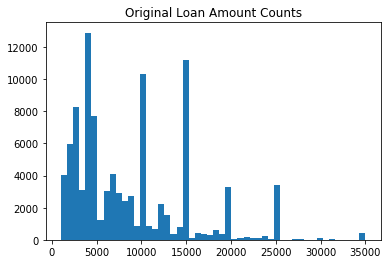

In [20]:
#Choosing a histogram to see the distribution of the loan amounts
plt.hist(data=loan_data, x='LoanOriginalAmount', bins=50);
plt.title('Original Loan Amount Counts');

On first glance the data is heavily skewed to the right. This makes sense logically because smaller loans are more common than huge ones. When I increased the bin number I was able to see that there is a spike near the 5000 increment amounts.

Let's look at a few more univariate plots before moving on to bi/multivariate exploration. Loan status and employment status could be useful for univariate explorations.

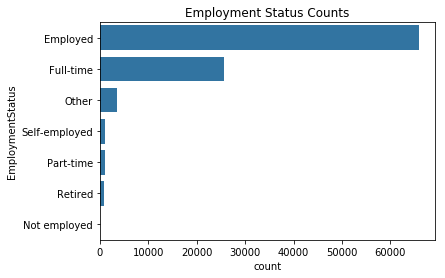

In [23]:
base_color = sb.color_palette()[0]
cat_order = loan_data['EmploymentStatus'].value_counts().index
sb.countplot(data=loan_data, y='EmploymentStatus', order=cat_order, color=base_color).set_title('Employment Status Counts');

As you can see here, the vast majority of Prosper clients are employed. This is to be expected, I doubt that companies often give out loans to individuals or businesses that do not at least have a source of repayment.

However, loan status may be more indicative of something to use for further exploring.First I will need to convert a few of the categories into a single "Past Due" category that ecompassess all loans that are currently late.

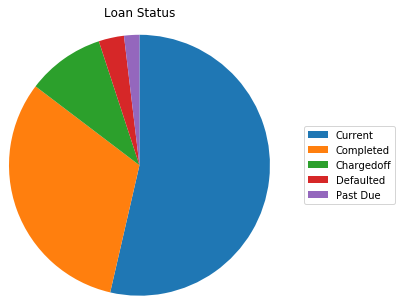

In [27]:
loan_data = loan_data.replace(['Past Due (1-15 days)', 'Past Due (31-60 days)', 'Past Due (91-120 days)', 'Past Due (61-90 days)', 
                   'Past Due (16-30 days)', 'Past Due (>120 days)', 'Cancelled', 'FinalPaymentInProgress'], ['Past Due', 
                    'Past Due', 'Past Due', 'Past Due', 'Past Due', 'Past Due', 'Chargedoff', 'Completed'])
sorted_counts = loan_data['LoanStatus'].value_counts()
plt.pie(sorted_counts, startangle = 90, counterclock = False, radius=1.5);
plt.legend(labels = sorted_counts.index, loc='right', bbox_to_anchor=(1.2, 0., 0.5, 1));
plt.title('Loan Status', pad=40);

This pie chart shows us that the vast majority of accounts are either current(meaning the client is not finished paying off the loan but has not been late) or completed. We can look at that vs some other variables moving forward.

Now on to some bivariate plots so we can look how certain variables behave compared to one another.

A few that I will consider to start are loan amount vs term length, borrower APR vs monthly loan payment, income verifiable vs loan amount, and term vs loan status. These should give me an idea of how to move forward.

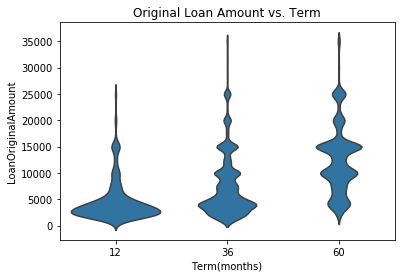

In [30]:
base_color = sb.color_palette()[0]
#rename term column to explain unit
loan_data = loan_data.rename(columns={'Term':'Term(months)'})
sb.violinplot(data = loan_data, x = 'Term(months)', y = 'LoanOriginalAmount', color=base_color, inner=None).set_title('Original Loan Amount vs. Term');

This is primarily what I expected to see, but it is interesting to see most of the range of loan prices in each category. I wonder why that is? Possibly lower interest rates or worse credit for the lendees in these cases.

Now we can move on to Borrower APR vs Monthly loan payment. I expect the highest payments to coorrelate to the highest APR.

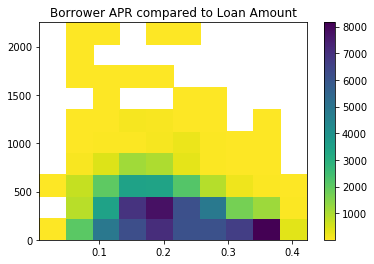

In [31]:
plt.hist2d(data = loan_data, x = 'BorrowerAPR', y = 'MonthlyLoanPayment', cmin=0.5, cmap='viridis_r');
plt.colorbar();
plt.title('Borrower APR compared to Loan Amount');

Surprisingly I did not find the coorrelation I expected a higher rate for larger payments but the amount could possibly have more effect than this exploration can overcome. We may want to look at all three simultaneously later.

For now, I'll move on to verifiable income vs loan amount. for this I will use a box plot.

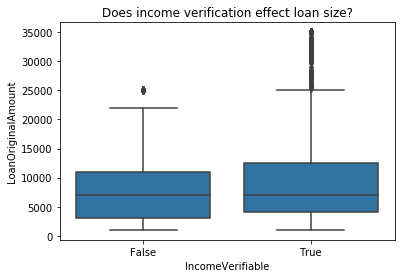

In [32]:
base_color = sb.color_palette()[0]
ax = sb.boxplot(data = loan_data, x = 'IncomeVerifiable', y = 'LoanOriginalAmount', color = base_color).set_title('Does income verification effect loan size?');

Interestingly, the loan amounts are pretty similar for the two levels normally. However, it seems that the much larger loans are given when the income is verifiable.

Finally, let's look at loan status vs term, comparing two categorical variables, before moving onto our most in depth explorations.

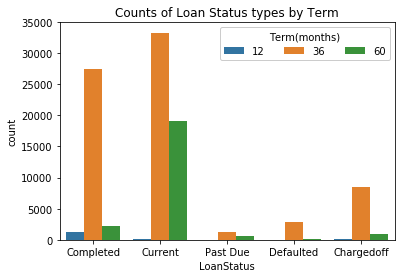

In [35]:
ax = sb.countplot(data = loan_data, x = 'LoanStatus', hue = 'Term(months)')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'Term(months)');
plt.title('Counts of Loan Status types by Term');

There is some useful information here. For example, the uncompleted loans(chargedoff, defaulted, and past due) for the longest term length of 60 months are approximately the same amount completed. Could this be indicative that shorter loans are more often payed off as expected? The trend does continue to show when you look at 12 month loans, there are almost none that fall into the previously stated uncompleted category. I will keep this in mind in the next steps.

Now I'm going to move on to multivariate exploratory plots. These will show us many data points at many levels and hopefully bring some insight into what factors are most consistent with satisfactory loan repayment.


Text(0.5, 1.0, 'Does customer history effect loan sizes?')

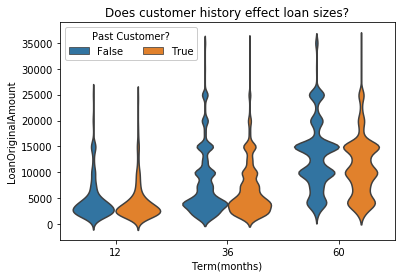

In [36]:
ax = sb.violinplot(data = loan_data, x = 'Term(months)', y = 'LoanOriginalAmount', hue = 'ProsperCustomerHistory', inner=None);
ax.legend(loc = 2, ncol = 2, framealpha = 1, title = 'Past Customer?');
plt.title('Does customer history effect loan sizes?')

Shockingly the loan amounts didn't really seem to have a big difference when moving from a past customer to a new customer. I thought one would be more trusted!

Let's try to look at original loan amount, if the borrower is a homeowner, and the percent funded simultaneously.

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


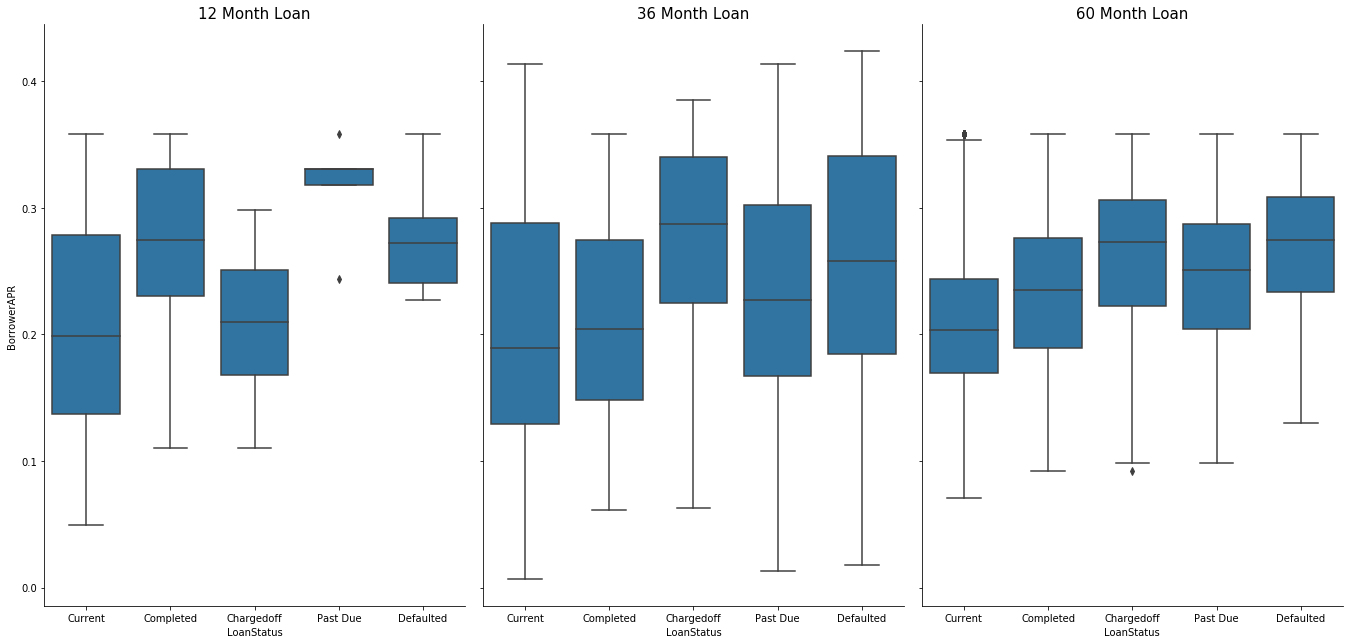

In [38]:
g = sb.FacetGrid(data = loan_data, col = 'Term(months)', height = 9, aspect = 0.7, col_wrap = 3);
g.map(sb.boxplot, 'LoanStatus', 'BorrowerAPR');
g.set_titles('{col_name} Month Loan', size=15);

This shows that while the ranges can vary considerably, on average most of the up to date or completed loans are those with a lower APR. This makes sense, it is easier to pay things off when you accrue less interest.

I have found a few factors that seem to be more indicative of a loan not being paid off as expected. I think now it is time to make some polished visuals to wow the viewers.